In [18]:
import sys
import collections
import itertools
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.spatial.distance import squareform

plt.style.use('bmh')
%matplotlib inline

def dtw_distance(ts_1, ts_2):    
     #ts_1: time serie 1 
     #ts_2: time serie 2
    
    ##COMPLETE: USE fastdtw to calculate disitance between 2 time series
    distance, path = fastdtw(ts_1, ts_2, dist=euclidean)
    return distance
      
    
def dist_matrix(x, y):
    '''x, y are 2 arrays contains many time series '''
    x_s = np.shape(x)
    y_s = np.shape(y)
    dm = np.zeros((x_s[0], y_s[0]))
    dm_size = x_s[0]*y_s[0]
    for i in range(x_s[0]):
        print("\ni=", i, "/", x_s[0]-1)
        for j in range(y_s[0]):
            print("j=", j, "/", y_s[0]-1)
            dm[i,j] = dtw_distance(x[i], y[j])

    ##TODO: calculate distance matrix of 2 time series list/array

    return dm

### Calculate and visualize distance btw 2 series

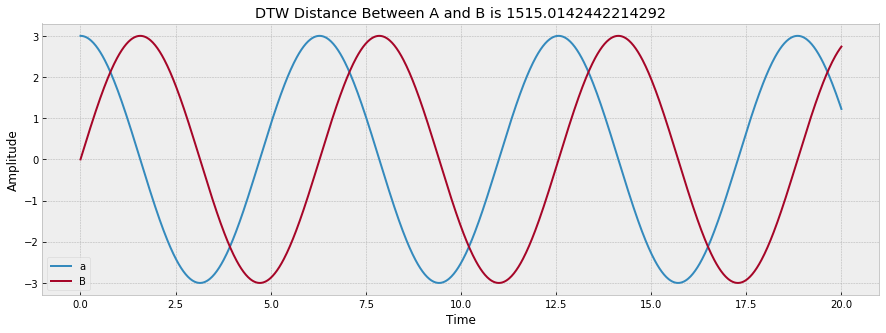

In [2]:
time = np.linspace(0,20,1000)
amplitude_a = 3*np.cos(time)
amplitude_b = 3*np.sin(time)

distance = dtw_distance(amplitude_a, amplitude_b)

##COMPLETE: Visulize distance matrix of 2 time series
plt.figure(figsize=(15,5))
plt.plot(time, amplitude_a)
plt.plot(time, amplitude_b)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("DTW Distance Between A and B is " + str(distance))
plt.legend(["a", "B"])
plt.show()

### Test dist_matrix function

In [39]:
array1 = np.random.random((10,50))
array2 = np.random.random((4,50))     
distances = dist_matrix(array1,array2)
labels = np.array([0,1,2,3,0,1,2,3,0,1])

print(distances)
sorted_index = np.argsort(distances, axis=0)
print(sorted_index)
n_closest_index = sorted_index[:5,:]
print(n_closest_index)
knn_labels = labels[n_closest_index]
print(knn_labels)

mode_data = mode(knn_labels, axis=0)
mode_label = mode_data[0]
mode_proba = mode_data[1]/5
print(mode_label.ravel(), mode_proba.ravel())



i= 0 / 9
j= 0 / 3
j= 1 / 3
j= 2 / 3
j= 3 / 3

i= 1 / 9
j= 0 / 3
j= 1 / 3
j= 2 / 3
j= 3 / 3

i= 2 / 9
j= 0 / 3
j= 1 / 3
j= 2 / 3
j= 3 / 3

i= 3 / 9
j= 0 / 3
j= 1 / 3
j= 2 / 3
j= 3 / 3

i= 4 / 9
j= 0 / 3
j= 1 / 3
j= 2 / 3
j= 3 / 3

i= 5 / 9
j= 0 / 3
j= 1 / 3
j= 2 / 3
j= 3 / 3

i= 6 / 9
j= 0 / 3
j= 1 / 3
j= 2 / 3
j= 3 / 3

i= 7 / 9
j= 0 / 3
j= 1 / 3
j= 2 / 3
j= 3 / 3

i= 8 / 9
j= 0 / 3
j= 1 / 3
j= 2 / 3
j= 3 / 3

i= 9 / 9
j= 0 / 3
j= 1 / 3
j= 2 / 3
j= 3 / 3
[[11.21515625 11.88295313  9.84040686 11.13652282]
 [10.50563403 11.60242671 10.56201128 11.52459569]
 [10.11843876 11.91726715  8.85938931 10.16412498]
 [10.56214399  8.49255903  7.23899615  9.20319762]
 [12.03698178 10.19867144 10.73252414  8.14533411]
 [12.84949653 11.97388316  9.50102889 12.18360205]
 [10.15840621 12.38370101  8.70048182  8.4695165 ]
 [11.48912603 11.1731137   9.28729459  9.66768104]
 [12.10726544 10.23664839 10.29968154 10.5234175 ]
 [ 9.42396383 10.35076864 11.21232306 13.19406862]]
[[9 3 3 4]
 [2 4 6 6]
 [6 8 2

### Implement KNN classification

In [40]:
class KNN(object):
    
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    
    def fit(self, x, l):
        self.training_x = x
        self.training_label = l

    def predict(self, x):
        ##COMPLETE: identify the k nearest neighbors using dist_matrix
        distances = dist_matrix(self.training_x, x)
       
        #COMPLETE: Identify k nearest labels
        sorted_index = np.argsort(distances, axis=0)
        n_closest_index = sorted_index[:self.n_neighbors,:]
        knn_labels = self.training_label[n_closest_index]
        
        # Model Label
        mode_data = mode(knn_labels, axis=0)
        mode_label = mode_data[0]
        mode_proba = mode_data[1]/self.n_neighbors

        return mode_label.ravel(), mode_proba.ravel()


## Human Activity Recognition Dataset

In [5]:
# Import the HAR dataset
x_train_file = open('data/X_train.txt', 'r')
y_train_file = open('data/y_train.txt', 'r')

x_test_file = open('data/X_test.txt', 'r')
y_test_file = open('data/y_test.txt', 'r')

x_train = []
y_train = []
x_test = []
y_test = []

# Mapping table for classes
labels = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',
          4:'SITTING', 5:'STANDING', 6:'LAYING'}

for x in x_train_file:
    x_train.append([float(ts) for ts in x.split()])
    
for y in y_train_file:
    y_train.append(int(y.rstrip('\n')))
    
for x in x_test_file:
    x_test.append([float(ts) for ts in x.split()])
    
for y in y_test_file:
    y_test.append(int(y.rstrip('\n')))
    
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

#### Visualizing sample activities from the HAR dataset

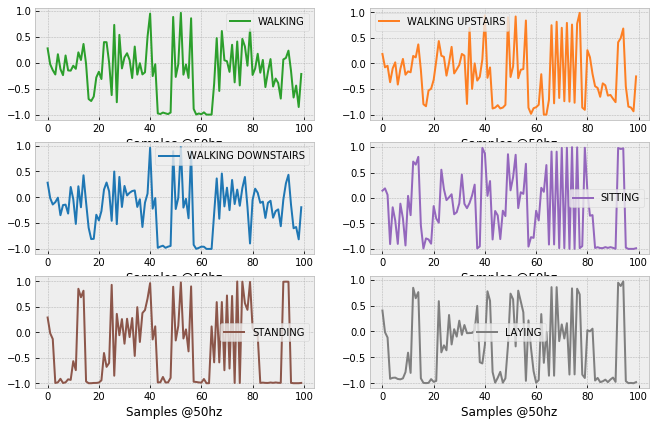

In [28]:
plt.figure(figsize=(11,7))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for key in labels:
    # Select first matching label from set
    index = np.where(y_train == key)
    data = x_train[index[0][0]]

    plt.subplot(320+key)
    plt.plot(range(100), data[0:100], color=colors[key])
    plt.xlabel("Samples @50hz")
    plt.legend([labels[key]])

##COMPLETE: Visulize sample activities
plt.show()


In [41]:
m = KNN(n_neighbors=1)
m.fit(x_train, y_train)
print("train length:", len(x_train), len(y_train), "test length:", len(x_test), len(y_test))
label, proba = m.predict(x_test)
print(label, proba)

train length: 90 90 test length: 8 8

i= 0 / 89
j= 0 / 7
j= 1 / 7
j= 2 / 7
j= 3 / 7
j= 4 / 7
j= 5 / 7
j= 6 / 7
j= 7 / 7

i= 1 / 89
j= 0 / 7
j= 1 / 7
j= 2 / 7
j= 3 / 7
j= 4 / 7
j= 5 / 7
j= 6 / 7
j= 7 / 7

i= 2 / 89
j= 0 / 7
j= 1 / 7
j= 2 / 7
j= 3 / 7
j= 4 / 7
j= 5 / 7
j= 6 / 7
j= 7 / 7

i= 3 / 89
j= 0 / 7
j= 1 / 7
j= 2 / 7
j= 3 / 7
j= 4 / 7
j= 5 / 7
j= 6 / 7
j= 7 / 7

i= 4 / 89
j= 0 / 7
j= 1 / 7
j= 2 / 7
j= 3 / 7
j= 4 / 7
j= 5 / 7
j= 6 / 7
j= 7 / 7

i= 5 / 89
j= 0 / 7
j= 1 / 7
j= 2 / 7
j= 3 / 7
j= 4 / 7
j= 5 / 7
j= 6 / 7
j= 7 / 7

i= 6 / 89
j= 0 / 7
j= 1 / 7
j= 2 / 7
j= 3 / 7
j= 4 / 7
j= 5 / 7
j= 6 / 7
j= 7 / 7

i= 7 / 89
j= 0 / 7
j= 1 / 7
j= 2 / 7
j= 3 / 7
j= 4 / 7
j= 5 / 7
j= 6 / 7
j= 7 / 7

i= 8 / 89
j= 0 / 7
j= 1 / 7
j= 2 / 7
j= 3 / 7
j= 4 / 7
j= 5 / 7
j= 6 / 7
j= 7 / 7

i= 9 / 89
j= 0 / 7
j= 1 / 7
j= 2 / 7
j= 3 / 7
j= 4 / 7
j= 5 / 7
j= 6 / 7
j= 7 / 7

i= 10 / 89
j= 0 / 7
j= 1 / 7
j= 2 / 7
j= 3 / 7
j= 4 / 7
j= 5 / 7
j= 6 / 7
j= 7 / 7

i= 11 / 89
j= 0 / 7
j= 1 / 7
j= 2 / 7
j= 3 / 7
j

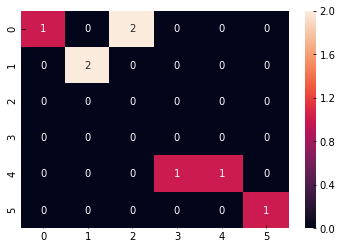

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(label, y_test)
##COMPLETE: Visualize the confusion matrix
ax = sns.heatmap(conf_mat, annot=True, fmt="d")